In [1]:
# Simple Linear Regression model to be saved and reused as a pk file - MLOps
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv(r"D:\workspace\NLP_CV\salary.csv")

In [4]:
# Define X and y
X = df[['YearsExperience']]    # Needs to be a dataframe, so double square brackets
y = df['Salary']

In [5]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Fit Simple Linear Regression to Trining Data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make prediction
y_pred = model.predict(X_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [8]:
# Assess model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R-squared: ", r2)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

R-squared:  0.9024461774180497
Mean Absolute Error :  6286.453830757749
Mean Squared Error :  49830096.85590839
Root Mean Squared Error :  7059.04362190151


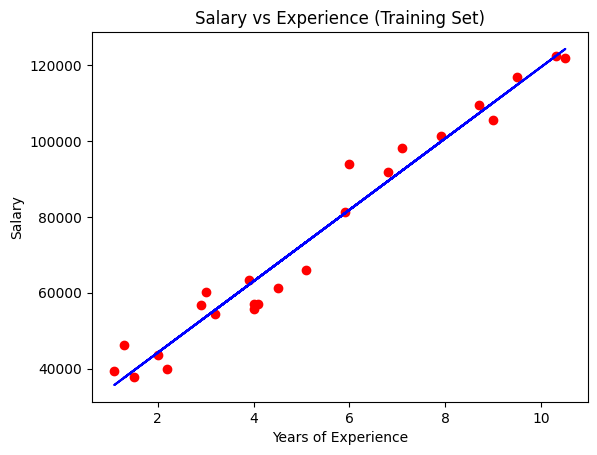

In [9]:
# Visualize Training Set Results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

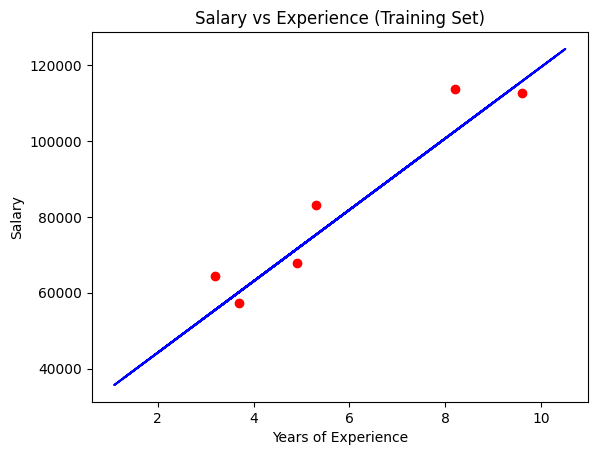

In [10]:
# Visualize test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [11]:
# Make new predictions
print("*** Making Predictions for new data ***")
new_experience_years_for_predictions = [1.5 , 4, 8, 12, 15, 20, 25]

for new_experience_years in new_experience_years_for_predictions:
  new_salary_pred = model.predict(pd.DataFrame({'YearsExperience': [new_experience_years]}))
  print(f"Experience in Years : {new_experience_years} ... Predicted Salary : {new_salary_pred}")

*** Making Predictions for new data ***
Experience in Years : 1.5 ... Predicted Salary : [39457.30599632]
Experience in Years : 4 ... Predicted Salary : [63016.8443039]
Experience in Years : 8 ... Predicted Salary : [100712.10559602]
Experience in Years : 12 ... Predicted Salary : [138407.36688815]
Experience in Years : 15 ... Predicted Salary : [166678.81285724]
Experience in Years : 20 ... Predicted Salary : [213797.8894724]
Experience in Years : 25 ... Predicted Salary : [260916.96608755]


In [12]:
# Saving Model (and everything else as pickle file)
import joblib
joblib.dump(model, 'final_salary_model.pkl')
print(X)
print(X.columns)
print(list(X.columns))
joblib.dump(list(X.columns), 'salary_column_names.pkl')


    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
Index(['YearsExperience'], dtype='object')
['YearsExperience']


['salary_column_names.pkl']

In [13]:
# loading model (model persistence)
col_names = joblib.load('salary_column_names.pkl')
print(col_names)

['YearsExperience']


In [14]:
loaded_model = joblib.load('final_salary_model.pkl')

In [15]:
# make new prediction using the loaded model
print("***Making predictions for new data using Loaded model ***")
new_experience_years_for_predictions = [1.5, 4, 8, 12, 15, 20, 25]


for new_experience_years in new_experience_years_for_predictions:
  new_salary_pred = loaded_model.predict(pd.DataFrame({'YearsExperience' : [new_experience_years]}))
  print(f"Experience in years: {new_experience_years} .... Predicted salary: {new_salary_pred}")

***Making predictions for new data using Loaded model ***
Experience in years: 1.5 .... Predicted salary: [39457.30599632]
Experience in years: 4 .... Predicted salary: [63016.8443039]
Experience in years: 8 .... Predicted salary: [100712.10559602]
Experience in years: 12 .... Predicted salary: [138407.36688815]
Experience in years: 15 .... Predicted salary: [166678.81285724]
Experience in years: 20 .... Predicted salary: [213797.8894724]
Experience in years: 25 .... Predicted salary: [260916.96608755]
